# Repeatable Statistical Inference Demo - Distributions

In [4]:
# Add parent directory to path for imports
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

# Import our implementations
from distributions import (
    Distribution01, BernoulliRare, BetaSkewed, 
    BimodalMixture, UniformSpike, TruncatedNormal
)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'Times New Roman'  # Set font family
plt.rcParams['font.size'] = 14          # Increased from 12
plt.rcParams['axes.labelsize'] = 16     # Axis labels
plt.rcParams['axes.titlesize'] = 18     # Title size
plt.rcParams['xtick.labelsize'] = 14    # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 14    # Y-axis tick labels
plt.rcParams['legend.fontsize'] = 14    # Legend font size
plt.rcParams['figure.titlesize'] = 20   # Figure title size

In [5]:
# Define our test distributions
test_distributions = [
    BernoulliRare(p=0.1),                           # Rare events
    BetaSkewed(alpha=0.5, beta=2.0),               # Right-skewed
    BetaSkewed(alpha=2.0, beta=0.5),               # Left-skewed
    TruncatedNormal(mu=0.3, sigma=0.15),           # Truncated normal
    BimodalMixture(weight=0.3),                    # Bimodal
    UniformSpike(spike_location=0.8, spike_prob=0.2)  # Uniform + spike
]

print("Test Distributions:")
for i, dist in enumerate(test_distributions):
    print(f"{i+1}. {dist.name}")
    print(f"   True mean: {dist.true_mean():.4f}")
    print()

Test Distributions:
1. Bernoulli(0.100)
   True mean: 0.1000

2. Beta(0.5, 2.0)
   True mean: 0.2000

3. Beta(2.0, 0.5)
   True mean: 0.8000

4. TruncNorm(μ=0.30, σ=0.15)
   True mean: 0.3083

5. BiModal(w=0.30)
   True mean: 0.6200

6. UniformSpike(0.80, 0.20)
   True mean: 0.5600



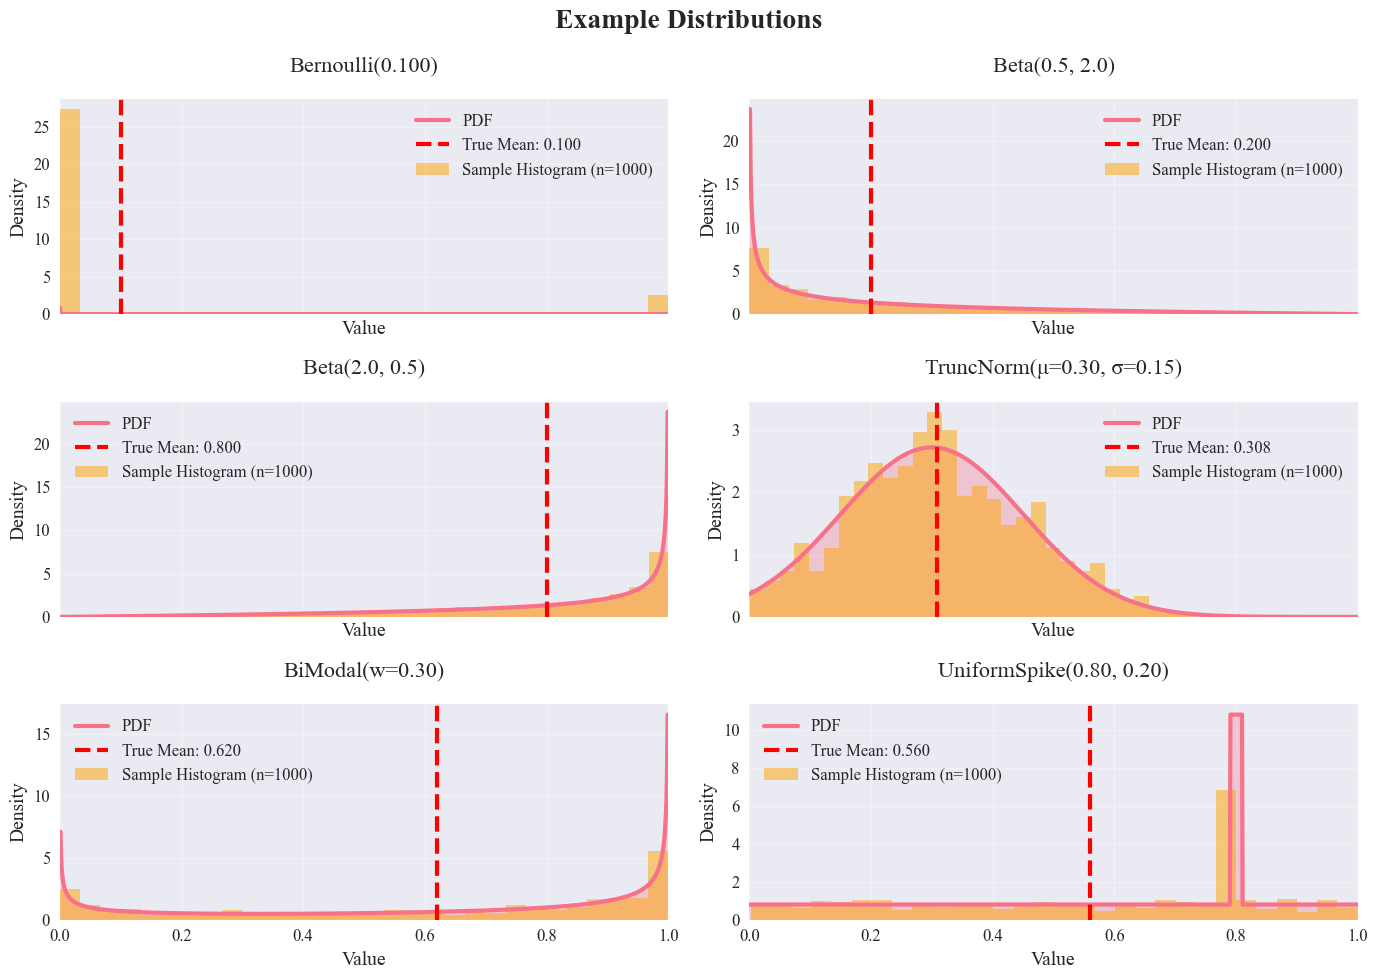

In [6]:
# Visualize the distributions
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)  # Increased figure size
axes = axes.flatten()

x = np.linspace(0, 1, 1000)

for i, dist in enumerate(test_distributions):
    ax = axes[i]
    
    # Plot PDF
    pdf_vals = dist.pdf(x)
    ax.plot(x, pdf_vals, linewidth=3, label=f'PDF')  # Thicker lines
    ax.fill_between(x, 0, pdf_vals, alpha=0.3)
    
    # Mark true mean
    true_mean = dist.true_mean()
    ax.axvline(true_mean, color='red', linestyle='--', linewidth=3, 
               label=f'True Mean: {true_mean:.3f}')
    
    # Generate and plot sample histogram
    samples = dist.sample(1000)
    ax.hist(samples, bins=30, density=True, alpha=0.5, color='orange', 
            label=f'Sample Histogram (n=1000)')
    
    ax.set_title(f'{dist.name}', fontsize=16, pad=20)
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    
    # Make tick labels larger
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('Example Distributions', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig("../images/distributions.png")
plt.show()